In [42]:
!apt-get update # Update apt-get repository.
!apt-get install openjdk-8-jdk-headless -qq > /dev/null # Install Java.
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz # Download Apache Sparks.
!tar xf spark-3.1.1-bin-hadoop3.2.tgz # Unzip the tgz file.
!pip install -q findspark # Install findspark. Adds PySpark to the System path during runtime.
from google.colab import drive
drive.mount('/content/gdrive')

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 388 kB in 2s (254 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
D

In [43]:
# Set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"
DATASET_PATH = "/content/gdrive/MyDrive/Sem\ 3/DPS/Project/Milestone2/yelp_dataset"

!ls

# Initialize findspark
import findspark
findspark.init()

# Create a PySpark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("YelpDataAnalysis").getOrCreate()
spark

gdrive	     spark-3.1.1-bin-hadoop3.2	    spark-3.1.1-bin-hadoop3.2.tgz.1  spark-warehouse
sample_data  spark-3.1.1-bin-hadoop3.2.tgz  spark-3.1.1-bin-hadoop3.2.tgz.2


In [44]:
business_df = spark.read.json(f"{DATASET_PATH}/yelp_academic_dataset_business.json")
review_df = spark.read.json(f"{DATASET_PATH}/yelp_academic_dataset_review.json")
user_df = spark.read.json(f"{DATASET_PATH}/yelp_academic_dataset_user.json")
tip_df = spark.read.json(f"{DATASET_PATH}/yelp_academic_dataset_tip.json")
checkin_df = spark.read.json(f"{DATASET_PATH}/yelp_academic_dataset_checkin.json")

In [45]:
business_df.printSchema()
business_df.show(5)
business_df.count()

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

150346

In [46]:
tip_df.printSchema()
tip_df.show(5)
tip_df.count()

root
 |-- business_id: string (nullable = true)
 |-- compliment_count: long (nullable = true)
 |-- date: string (nullable = true)
 |-- text: string (nullable = true)
 |-- user_id: string (nullable = true)

+--------------------+----------------+-------------------+--------------------+--------------------+
|         business_id|compliment_count|               date|                text|             user_id|
+--------------------+----------------+-------------------+--------------------+--------------------+
|3uLgwr0qeCNMjKenH...|               0|2012-05-18 02:17:21|Avengers time wit...|AGNUgVwnZUey3gcPC...|
|QoezRbYQncpRqyrLH...|               0|2013-02-05 18:35:10|They have lots of...|NBN4MgHP9D3cw--Sn...|
|MYoRNLb5chwjQe3c_...|               0|2013-08-18 00:56:08|It's open even wh...|-copOvldyKh1qr-vz...|
|hV-bABTK-glh5wj31...|               0|2017-06-27 23:05:38|Very decent fried...|FjMQVZjSqY8syIO-5...|
|_uN0OudeJ3Zl_tf6n...|               0|2012-10-06 19:43:09|Appetizers.. plat...|

908915

In [47]:
review_df.printSchema()
review_df.show(5)
review_df.count()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|
|YjUWPp

6990280

In [48]:
checkin_df.printSchema()
checkin_df.show(5)
checkin_df.count()

root
 |-- business_id: string (nullable = true)
 |-- date: string (nullable = true)

+--------------------+--------------------+
|         business_id|                date|
+--------------------+--------------------+
|---kPU91CF4Lq2-Wl...|2020-03-13 21:10:...|
|--0iUa4sNDFiZFrAd...|2010-09-13 21:43:...|
|--30_8IhuyMHbSOcN...|2013-06-14 23:29:...|
|--7PUidqRWpRSpXeb...|2011-02-15 17:12:...|
|--7jw19RH9JKXgFoh...|2014-04-21 20:42:...|
+--------------------+--------------------+
only showing top 5 rows



131930

In [49]:
user_df.printSchema()
user_df.show(5)
user_df.count()

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

+-------------+---------------+---------------+----------------+-----

1987897

In [50]:
business_df.select("categories").distinct().show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------+
|categories                                                                                                                   |
+-----------------------------------------------------------------------------------------------------------------------------+
|Arts & Entertainment, Event Planning & Services, Venues & Event Spaces, Museums                                              |
|Food, Convenience Stores, Restaurants, Food Delivery Services, Local Flavor, Delis                                           |
|Automotive, Auto Repair, Towing, Body Shops, Oil Change Stations, Auto Parts & Supplies, Tires                               |
|Makeup Artists, Hair Salons, Beauty & Spas                                                                                   |
|Breweries, American (New), Restaurants, Burgers, American (Traditional), Gastropubs, Brewpubs, Food, Fi

In [52]:
from pyspark.sql.functions import explode, split, col, count, desc

automotive_df = business_df.filter((col("state") == "AZ") & (col("categories").like("%Automotive%")))
# automotive_df.write.parquet(f"{DATASET_PATH}/arizona_autos_businesses.parquet")
# Show filtered dataset
automotive_df.show(5)
automotive_df.count()

+--------------------+--------------------+--------------------+--------------------+------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|  city|               hours|is_open|  latitude|   longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|     625 N Stone Ave|{null, null, null...|rBmpy_Y1UbBx8ggHl...|Automotive, Auto ...|Tucson|{8:0-17:0, 0:0-0:...|      1|32.2298719|-110.9723419|Arizona Truck Out...|      85705|          10|  4.5|   AZ|
|     4158 E Grant Rd|                null|eYxGFkxo6m3SYGVTh...|Towing, Hotels & ...|Tucson|{8:30-18:0, 8:30-...|      1|32.2503237|-110.9036553|Big Boyz Toyz Mot...|      85712|      

872

In [53]:
automotive_df.createOrReplaceTempView("automotive")
checkin_df.createOrReplaceTempView("checkin")
review_df.createOrReplaceTempView("reviews")
user_df.createOrReplaceTempView("users")
tip_df.createOrReplaceTempView("tip")

## SQL Queries

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Create the joined view
query = """
SELECT
    r.user_id,
    u.name as user_name,
    u.review_count as review_count,
    r.business_id,
    r.stars,
    r.useful,
    r.funny,
    r.cool,
    r.date as review_date,
    a.name as business_name,
    a.city,
    a.state,
    a.categories
FROM reviews r
JOIN users u ON r.user_id = u.user_id
JOIN automotive a ON r.business_id = a.business_id
"""
joined_df = spark.sql(query)
joined_df.createOrReplaceTempView("user_business_reviews")

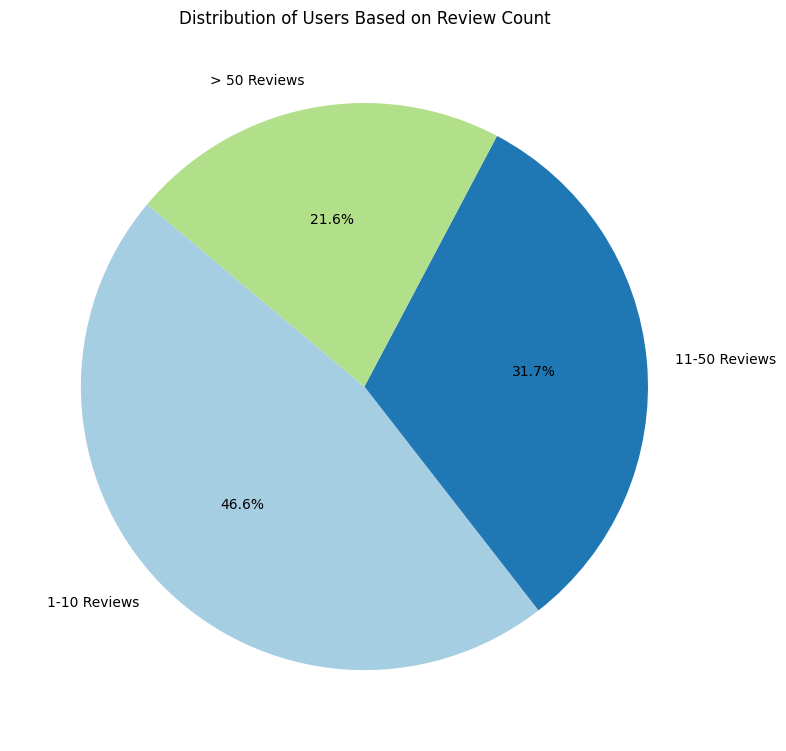

In [57]:
## 1. Distribution of Users Based on Review Count
query = """
    SELECT
        CASE
            WHEN review_count BETWEEN 1 AND 10 THEN '1-10 Reviews'
            WHEN review_count BETWEEN 11 AND 50 THEN '11-50 Reviews'
            WHEN review_count > 50 THEN '> 50 Reviews'
            ELSE 'No Reviews'
        END AS review_range,
        COUNT(user_id) AS user_count
    FROM user_business_reviews
    GROUP BY review_range
    ORDER BY user_count DESC;
"""
result_df = spark.sql(query)
pandas_df = result_df.toPandas()

# Plot Pie Chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(
    pandas_df["user_count"],
    labels=pandas_df["review_range"],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Distribution of Users Based on Review Count")
plt.tight_layout()
plt.show()


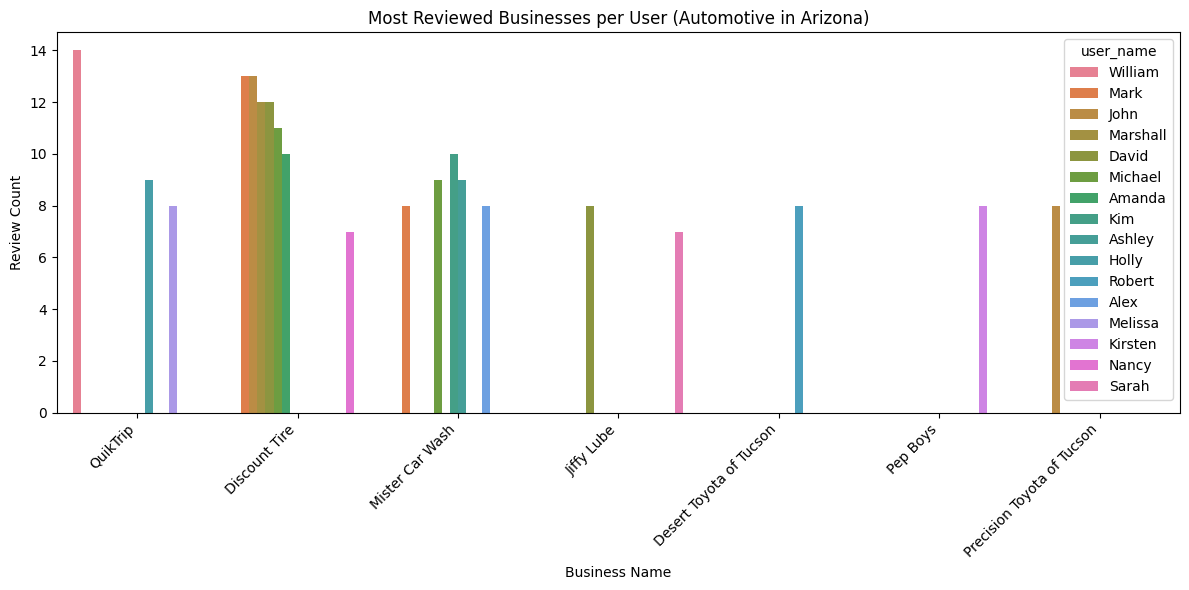

In [58]:
## 2. Most Reviewed Businesses per User
query = """
SELECT user_name, business_name, COUNT(*) as review_count
FROM user_business_reviews
GROUP BY user_name, business_name
ORDER BY review_count DESC
LIMIT 20
"""
result_df = spark.sql(query)
pandas_df = result_df.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=pandas_df, x="business_name", y="review_count", hue="user_name")
plt.title("Most Reviewed Businesses per User (Automotive in Arizona)")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Business Name")
plt.ylabel("Review Count")
plt.tight_layout()
plt.show()

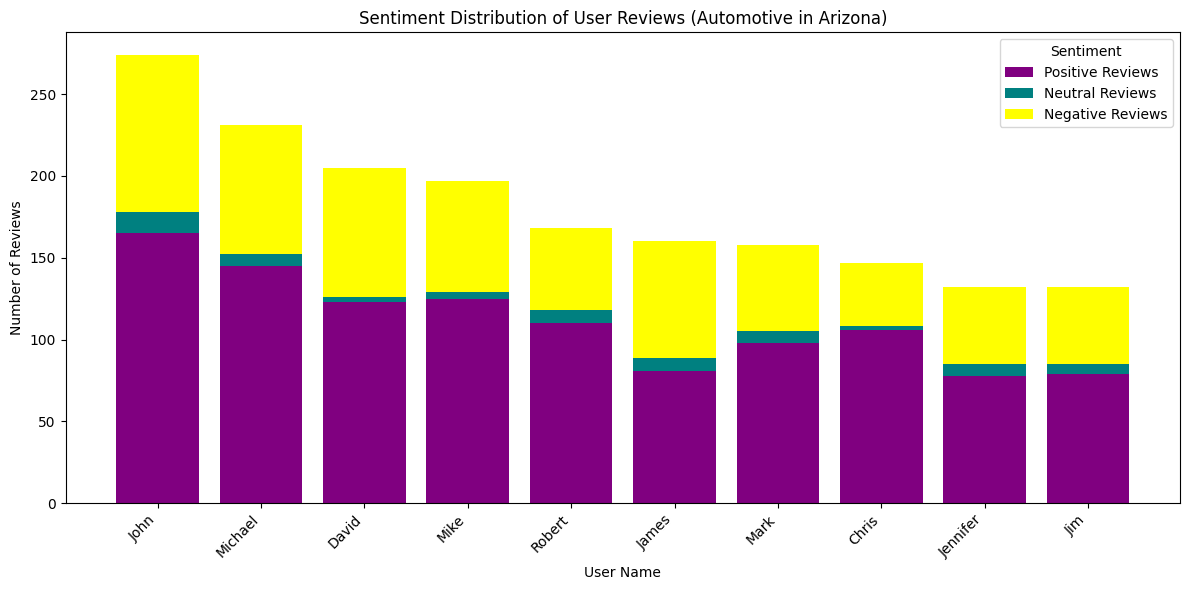

In [59]:
## 3. Classify reviews into positive, neutral, and negative sentiments

import numpy as np

sentiment_df = spark.sql("""
SELECT
    u.name AS user_name,
    SUM(CASE WHEN r.stars >= 4 THEN 1 ELSE 0 END) AS positive_reviews,
    SUM(CASE WHEN r.stars = 3 THEN 1 ELSE 0 END) AS neutral_reviews,
    SUM(CASE WHEN r.stars <= 2 THEN 1 ELSE 0 END) AS negative_reviews
FROM user_business_reviews r
JOIN users u ON r.user_id = u.user_id
GROUP BY u.name
ORDER BY (positive_reviews + neutral_reviews + negative_reviews) DESC
LIMIT 10
""")

# Convert to Pandas DataFrame for visualization
pandas_df = sentiment_df.toPandas()

# Data for plotting
user_names = pandas_df["user_name"]
positive = pandas_df["positive_reviews"]
neutral = pandas_df["neutral_reviews"]
negative = pandas_df["negative_reviews"]

# Bar width
bar_width = 0.8

# Bar positions
indices = np.arange(len(user_names))

# Plot
plt.figure(figsize=(12, 6))
plt.bar(indices, positive, label='Positive Reviews', color='purple')
plt.bar(indices, neutral, bottom=positive, label='Neutral Reviews', color='teal')
plt.bar(indices, negative, bottom=positive + neutral, label='Negative Reviews', color='yellow')

# Add labels and legend
plt.title("Sentiment Distribution of User Reviews (Automotive in Arizona)")
plt.xticks(indices, user_names, rotation=45, ha='right')
plt.xlabel("User Name")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

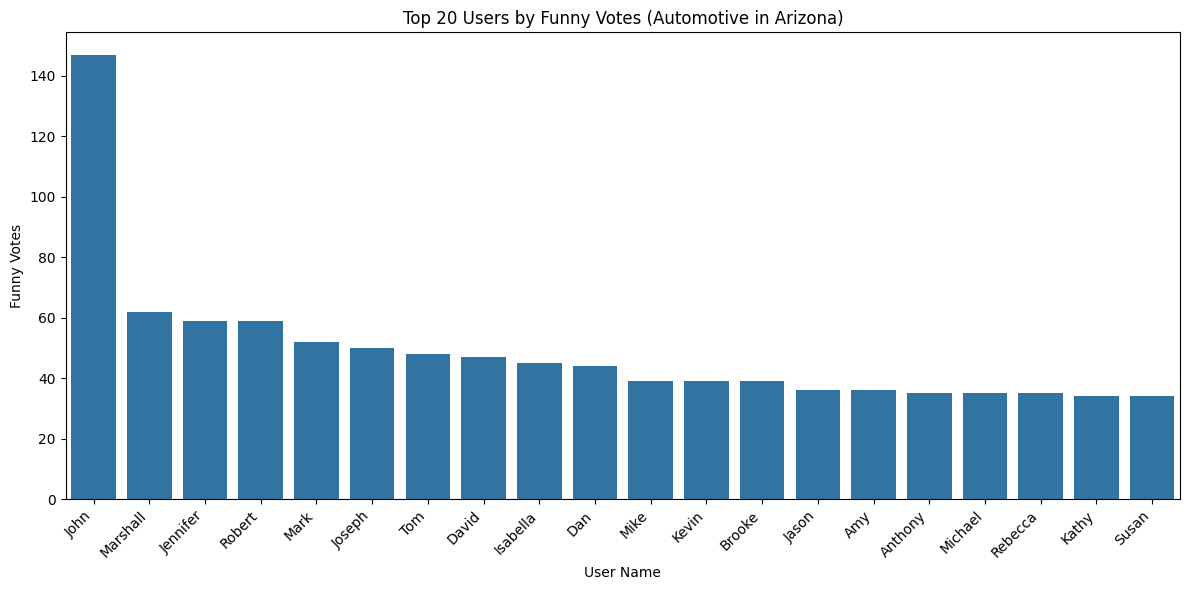

In [60]:
## 4. Top 20 Users by Funny Votes
query = """
SELECT user_name, SUM(funny) as funny_votes
FROM user_business_reviews
GROUP BY user_name
ORDER BY funny_votes DESC
LIMIT 20
"""
result_df = spark.sql(query)
pandas_df = result_df.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=pandas_df, x="user_name", y="funny_votes")
plt.title("Top 20 Users by Funny Votes (Automotive in Arizona)")
plt.xticks(rotation=45, ha='right')
plt.xlabel("User Name")
plt.ylabel("Funny Votes")
plt.tight_layout()
plt.show()

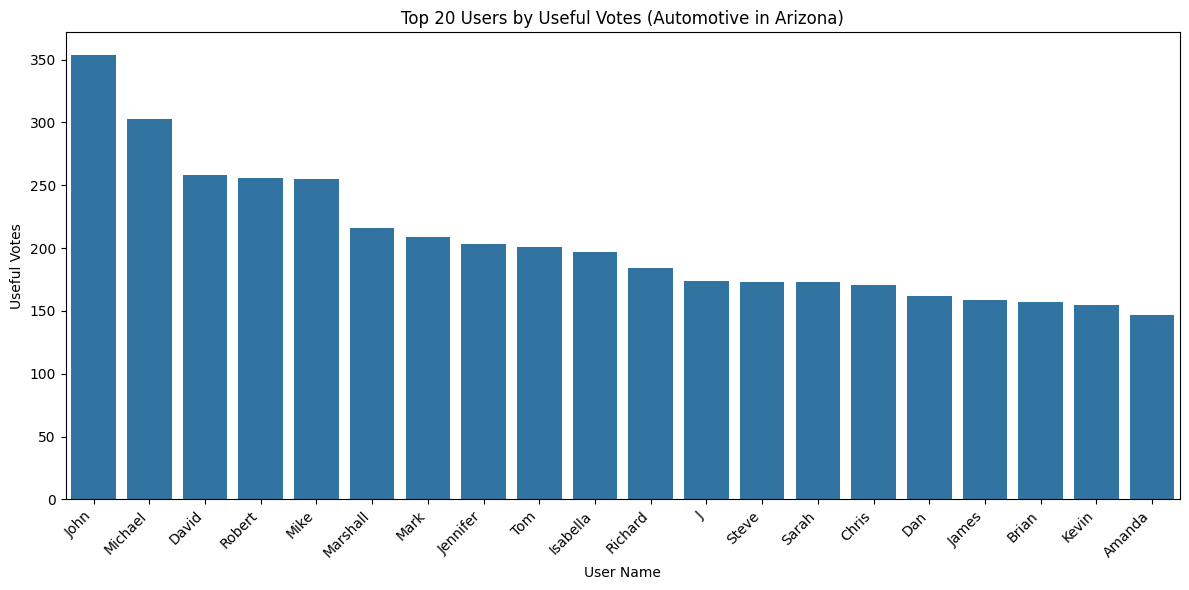

In [61]:
## 5. Top 20 Users by Useful Votes

query = """
SELECT user_name, SUM(useful) as useful_votes
FROM user_business_reviews
GROUP BY user_name
ORDER BY useful_votes DESC
LIMIT 20
"""
result_df = spark.sql(query)
pandas_df = result_df.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=pandas_df, x="user_name", y="useful_votes")
plt.title("Top 20 Users by Useful Votes (Automotive in Arizona)")
plt.xticks(rotation=45, ha='right')
plt.xlabel("User Name")
plt.ylabel("Useful Votes")
plt.tight_layout()
plt.show()

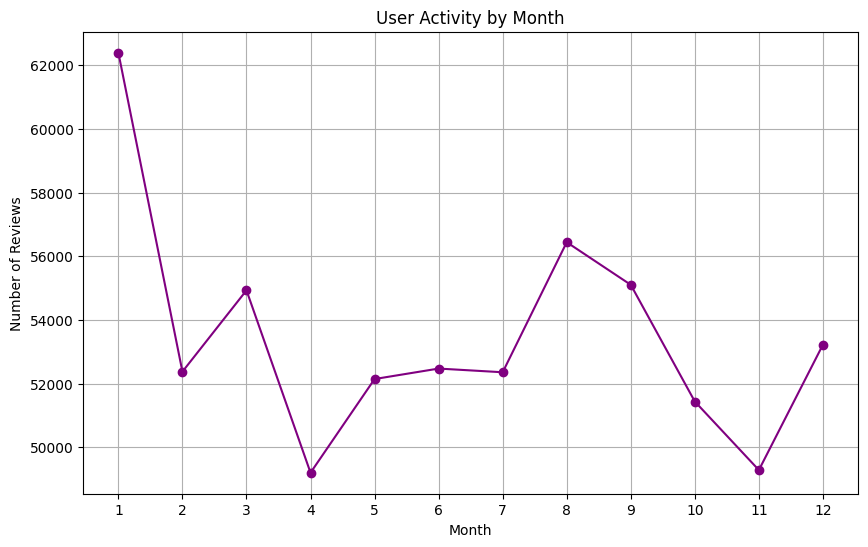

In [62]:
## 6. User Activity Timeseries

results_df = spark.sql("""
    SELECT
        MONTH(r.date) AS review_month,
        COUNT(r.review_id) AS review_count
    FROM reviews r
    JOIN user_business_reviews u ON r.user_id = u.user_id
    GROUP BY MONTH(r.date)
    ORDER BY review_month
""").toPandas()

plt.figure(figsize=(10, 6))
plt.plot(results_df['review_month'], results_df['review_count'], marker='o', color='purple')
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title('User Activity by Month')
plt.grid(True)
plt.show()

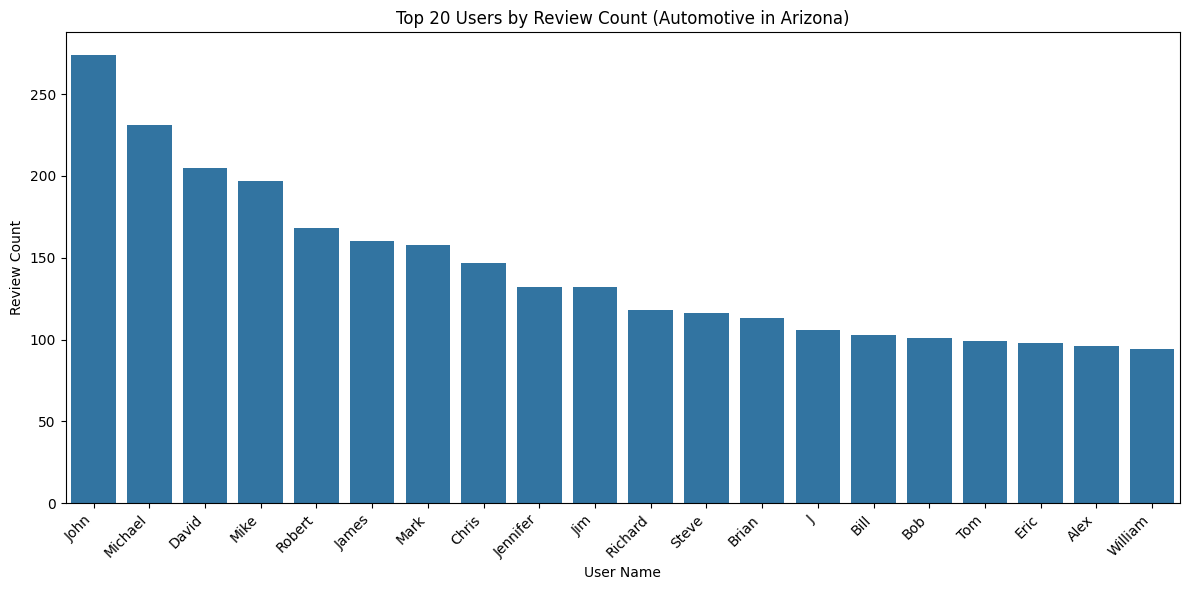

In [63]:
## 7. Top 20 Users by Review Count
query = """
SELECT user_name, COUNT(*) as review_count
FROM user_business_reviews
GROUP BY user_name
ORDER BY review_count DESC
LIMIT 20
"""
result_df = spark.sql(query)
pandas_df = result_df.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=pandas_df, x="user_name", y="review_count")
plt.title("Top 20 Users by Review Count (Automotive in Arizona)")
plt.xticks(rotation=45, ha='right')
plt.xlabel("User Name")
plt.ylabel("Review Count")
plt.tight_layout()
plt.show()


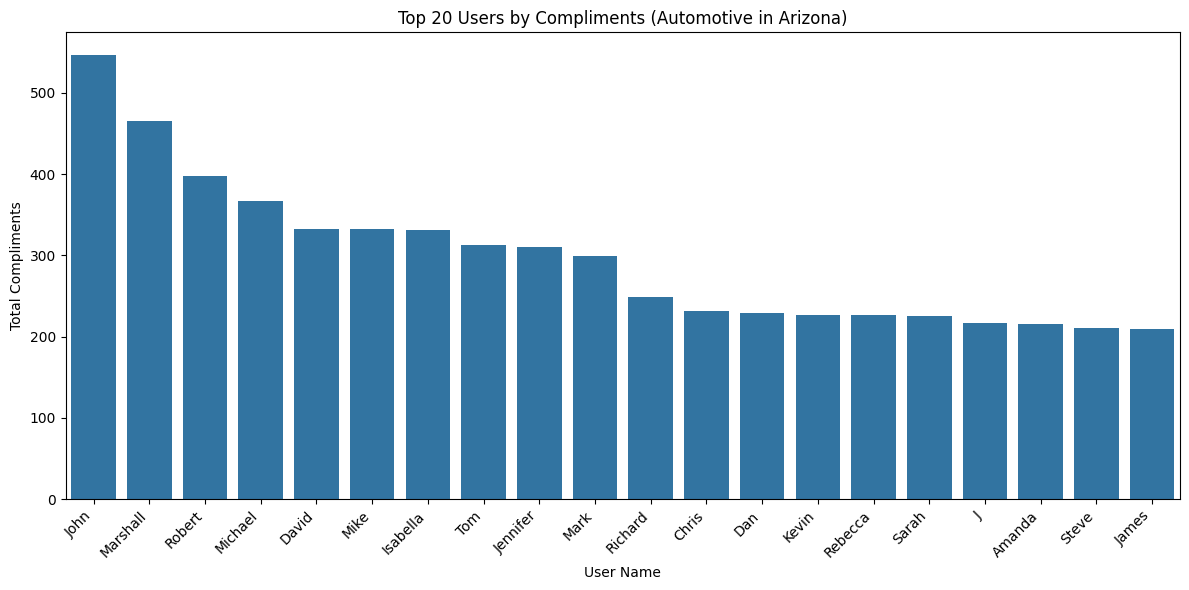

In [64]:
## 8. Top 20 Users by Compliments
query = """
SELECT user_name,
    (SUM(useful) + SUM(funny) + SUM(cool)) as total_compliments
FROM user_business_reviews
GROUP BY user_name
ORDER BY total_compliments DESC
LIMIT 20
"""
result_df = spark.sql(query)
pandas_df = result_df.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=pandas_df, x="user_name", y="total_compliments")
plt.title("Top 20 Users by Compliments (Automotive in Arizona)")
plt.xticks(rotation=45, ha='right')
plt.xlabel("User Name")
plt.ylabel("Total Compliments")
plt.tight_layout()
plt.show()

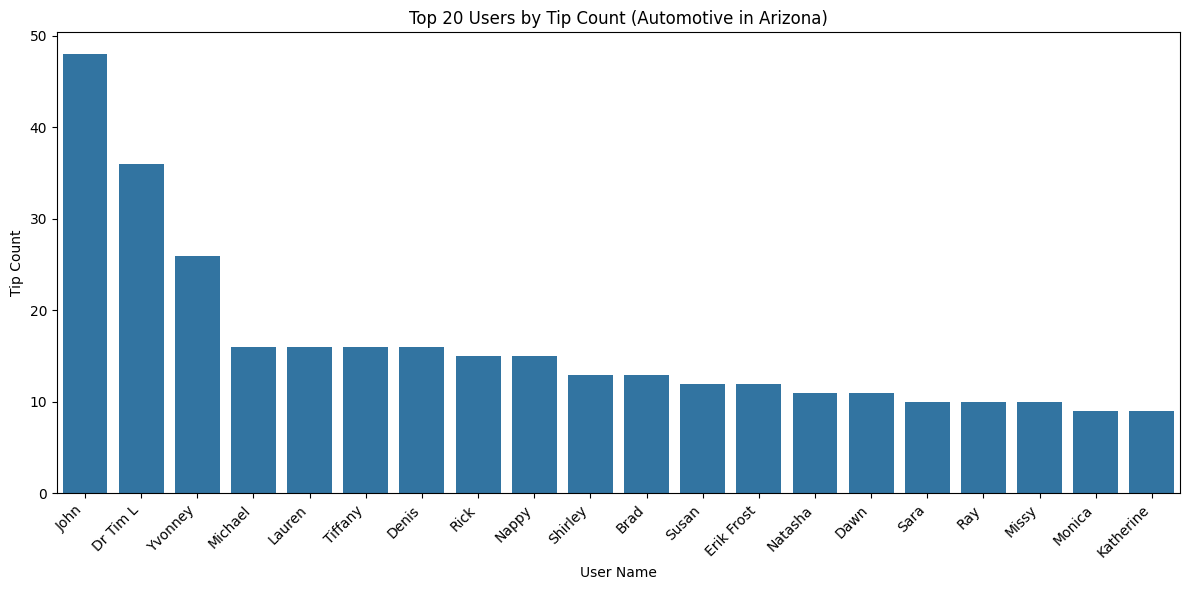

In [65]:
## 9. Top 20 Users by Tip Count
query = """
SELECT t.user_id, u.name as user_name, COUNT(*) as tip_count
FROM tip t
JOIN users u ON t.user_id = u.user_id
JOIN automotive a ON t.business_id = a.business_id
GROUP BY t.user_id, u.name
ORDER BY tip_count DESC
LIMIT 20
"""
result_df = spark.sql(query)
pandas_df = result_df.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=pandas_df, x="user_name", y="tip_count")
plt.title("Top 20 Users by Tip Count (Automotive in Arizona)")
plt.xticks(rotation=45, ha='right')
plt.xlabel("User Name")
plt.ylabel("Tip Count")
plt.tight_layout()
plt.show()

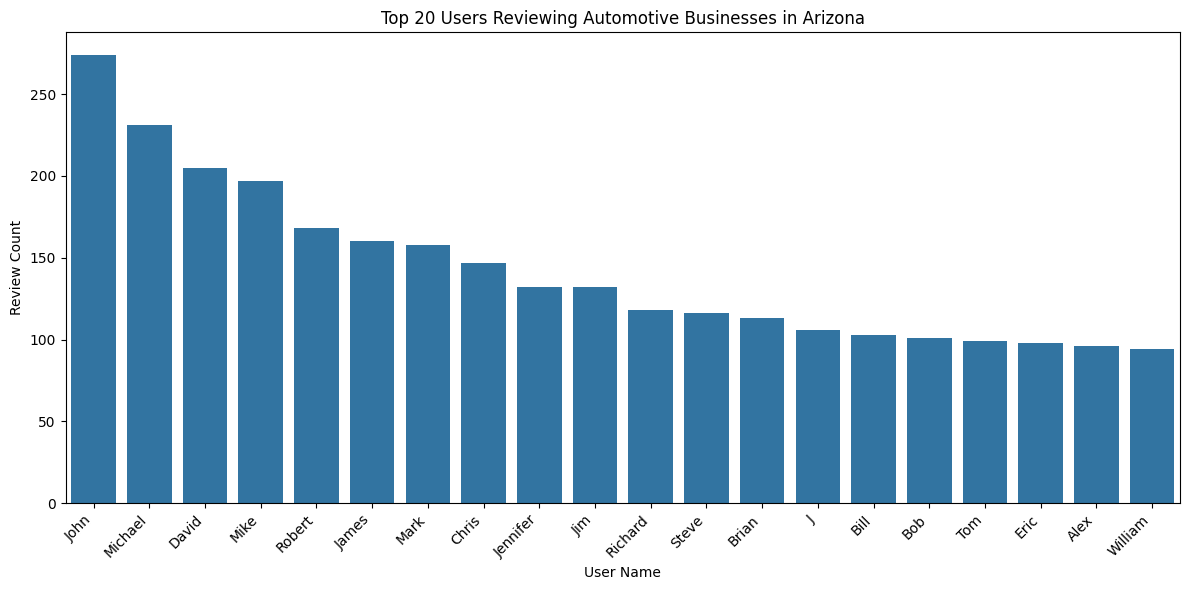

In [66]:
## 10. Top 20 Users Reviewing Automotive Businesses

query = """
SELECT user_name, COUNT(*) as review_count
FROM user_business_reviews
GROUP BY user_name
ORDER BY review_count DESC
LIMIT 20
"""
result_df = spark.sql(query)
pandas_df = result_df.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=pandas_df, x="user_name", y="review_count")
plt.title("Top 20 Users Reviewing Automotive Businesses in Arizona")
plt.xticks(rotation=45, ha='right')
plt.xlabel("User Name")
plt.ylabel("Review Count")
plt.tight_layout()
plt.show()